In [1]:
import numpy as np
import matplotlib.pyplot as plt


[0.         0.6981317  1.3962634  2.0943951  2.7925268  3.4906585
 4.1887902  4.88692191 5.58505361 6.28318531]
N:  10
Training error:  0.16067999417599418
Testing error:  0.1646823014423456
Important observation: uderfitting


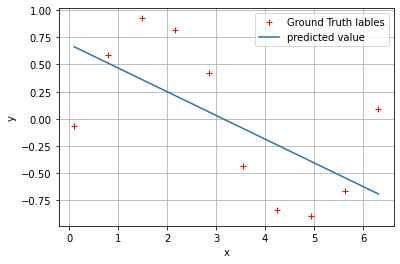

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

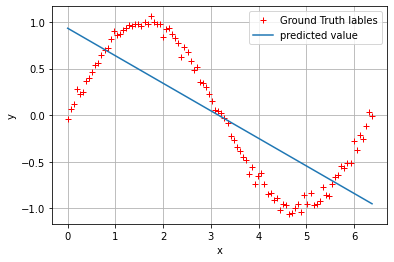

[0.         0.00628947 0.01257895 0.01886842 0.0251579  0.03144737
 0.03773685 0.04402632 0.0503158  0.05660527 0.06289475 0.06918422
 0.0754737  0.08176317 0.08805265 0.09434212 0.1006316  0.10692107
 0.11321055 0.11950002 0.1257895  0.13207897 0.13836845 0.14465792
 0.15094739 0.15723687 0.16352634 0.16981582 0.17610529 0.18239477
 0.18868424 0.19497372 0.20126319 0.20755267 0.21384214 0.22013162
 0.22642109 0.23271057 0.23900004 0.24528952 0.25157899 0.25786847
 0.26415794 0.27044742 0.27673689 0.28302637 0.28931584 0.29560531
 0.30189479 0.30818426 0.31447374 0.32076321 0.32705269 0.33334216
 0.33963164 0.34592111 0.35221059 0.35850006 0.36478954 0.37107901
 0.37736849 0.38365796 0.38994744 0.39623691 0.40252639 0.40881586
 0.41510534 0.42139481 0.42768429 0.43397376 0.44026323 0.44655271
 0.45284218 0.45913166 0.46542113 0.47171061 0.47800008 0.48428956
 0.49057903 0.49686851 0.50315798 0.50944746 0.51573693 0.52202641
 0.52831588 0.53460536 0.54089483 0.54718431 0.55347378 0.5597

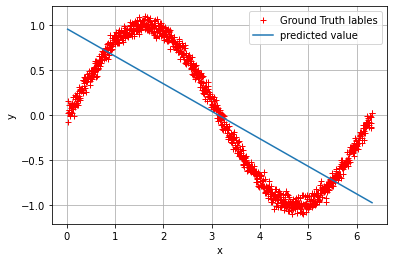

In [2]:
# Writing N=10,100,1000 as a part of one loop, m=1, linear case
for j in range(3):
    # Number of training/test samples
    m=1
    #the number of training data points
    N = 10**(j+1)
    # Generate equispaced floats in the interval [0, 2π]
    x = np.linspace(0, 2*np.pi, N)
    print(x)
    # Generate noise
    mean = 0
    std = 0.05
    # Generate some numbers from the sine function
    y = np.sin(x)
    # Add noise
    y += np.random.normal(mean, std, N)

    
    # y cap =b0+b1.x

    # X is our matrix [1, x1; 1, x2;,....]
    X=np.array([np.ones(N),x])
    for i in range(m-1):
        X=np.append(X,X[1,:]**(i+2))
    X=np.reshape(X,(m+1,N)).T
    
    
    #The optimal B vector [b_0; b_1] is (X.T * X)^-1 X.T y
    pseudo_inv = np.linalg.inv(np.matmul(X.T,X))
    B=np.matmul(pseudo_inv,np.matmul(X.T,y))


    #number of test cases T, lets go with N_test=N
    N_test=N
    
    #X_test is similar to X, except this is for testing 
    X_test=np.array([np.ones(N_test),np.linspace(0.1*np.random.rand(),2*np.pi+0.1*np.random.rand(),N_test)])
    for i in range(m-1):
        X_test=np.append(X_test,X_test[1,:]**(i+2))
    X_test=np.reshape(X_test,(m+1,N)).T

    # Generate some numbers from the sine function
    y_test = np.sin(x)
    # Add noise
    y_test += np.random.normal(mean, std, N_test)

    # The y_cap vector in training
    y_cap_train=np.matmul(X,B)
    # The y_cap vector in testing
    y_cap_test=np.matmul(X_test,B)


    #R(theta) is given as
    train_error=0
    for i in range(N):
        train_error+=np.square(y[i]-y_cap_train[i])
    train_error=np.sqrt(train_error)/N_test
    test_error=0
    for i in range(N_test):
        test_error+=np.square(y_test[i]-y_cap_test[i])
    test_error=np.sqrt(test_error)/N_test

    print("N: ",N)
    print("Training error: ", train_error)
    print("Testing error: ", test_error)
    print("Important observation: uderfitting")
    
    #Dsiplay the data
    plt.plot(X_test[:,1], y_test,'r+', label = 'Ground Truth lables')
    plt.plot(X_test[:,1], y_cap_test, label = 'predicted value')
    plt.legend()
    plt.grid(1)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


[ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.          0.6981317
  1.3962634   2.0943951   2.7925268   3.4906585   4.1887902   4.88692191
  5.58505361  6.28318531  0.          0.48738787  1.94955149  4.38649084
  7.79820595 12.18469679 17.54596338 23.88200571 31.19282379 39.4784176 ]
m:  2
N:  10
Training error:  0.15616441264318204
Testing error:  0.16306450307218373
Important observation: uderfitting


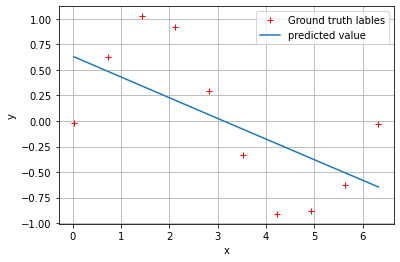

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

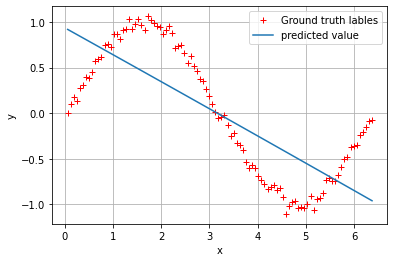

[ 1.          1.          1.         ... 39.32050409 39.39942129
 39.4784176 ]
m:  2
N:  1000
Training error:  0.014097639673713348
Testing error:  0.014123641265727252
Important observation: uderfitting


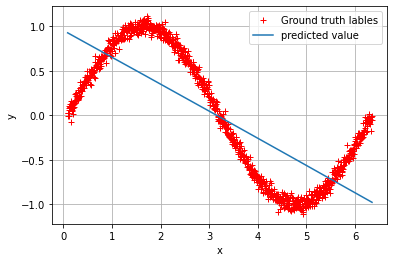

[ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.          0.6981317
  1.3962634   2.0943951   2.7925268   3.4906585   4.1887902   4.88692191
  5.58505361  6.28318531  0.          0.48738787  1.94955149  4.38649084
  7.79820595 12.18469679 17.54596338 23.88200571 31.19282379 39.4784176 ]
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   0.           0.6981317    1.3962634    2.0943951    2.7925268
   3.4906585    4.1887902    4.88692191   5.58505361   6.28318531
   0.           0.48738787   1.94955149   4.38649084   7.79820595
  12.18469679  17.54596338  23.88200571  31.19282379  39.4784176
   0.           0.34026092   2.72208739   9.18704494  21.77669912
  42.53261547  73.49635954 116.70949686 174.21359298 248.05021344]
m:  3
N:  10
Training error:  0.030150185995148498
Testing error:  0.032053371255153125
The model is fitting fine


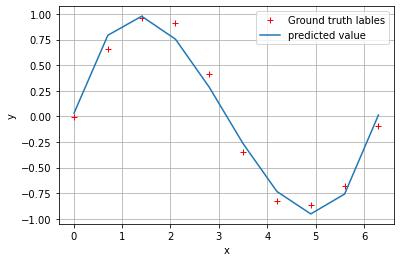

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

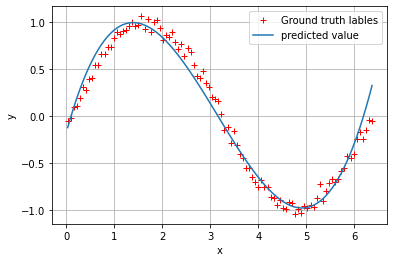

[ 1.          1.          1.         ... 39.32050409 39.39942129
 39.4784176 ]
[  1.           1.           1.         ... 246.56340295 247.3060633
 248.05021344]
m:  3
N:  1000
Training error:  0.0026184941259659346
Testing error:  0.003401088196730134
The model is fitting fine


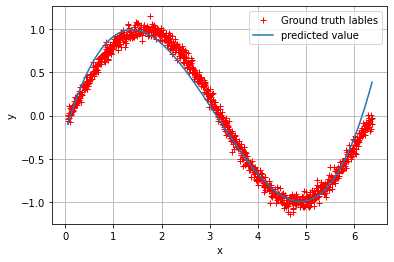

[ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.          0.6981317
  1.3962634   2.0943951   2.7925268   3.4906585   4.1887902   4.88692191
  5.58505361  6.28318531  0.          0.48738787  1.94955149  4.38649084
  7.79820595 12.18469679 17.54596338 23.88200571 31.19282379 39.4784176 ]
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   0.           0.6981317    1.3962634    2.0943951    2.7925268
   3.4906585    4.1887902    4.88692191   5.58505361   6.28318531
   0.           0.48738787   1.94955149   4.38649084   7.79820595
  12.18469679  17.54596338  23.88200571  31.19282379  39.4784176
   0.           0.34026092   2.72208739   9.18704494  21.77669912
  42.53261547  73.49635954 116.70949686 174.21359298 248.05021344]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.0000000

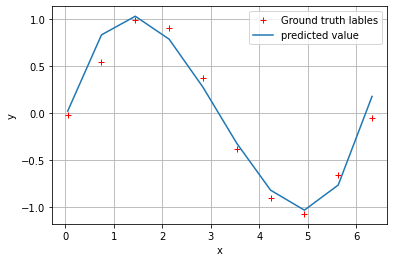

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

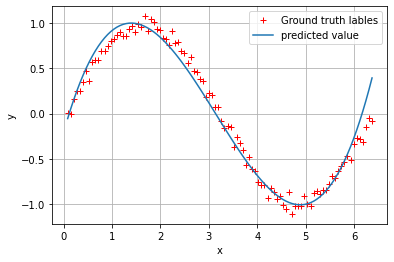

[ 1.          1.          1.         ... 39.32050409 39.39942129
 39.4784176 ]
[  1.           1.           1.         ... 246.56340295 247.3060633
 248.05021344]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.54610204e+03
 1.55231440e+03 1.55854546e+03]
m:  4
N:  1000
Training error:  0.002640566329491989
Testing error:  0.0028502664158378604
The model is fitting fine


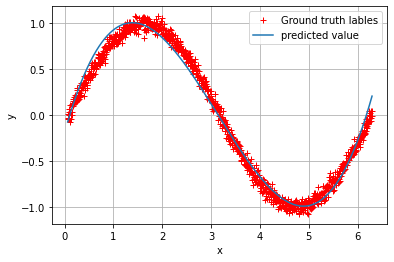

[ 1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          0.          0.6981317
  1.3962634   2.0943951   2.7925268   3.4906585   4.1887902   4.88692191
  5.58505361  6.28318531  0.          0.48738787  1.94955149  4.38649084
  7.79820595 12.18469679 17.54596338 23.88200571 31.19282379 39.4784176 ]
[  1.           1.           1.           1.           1.
   1.           1.           1.           1.           1.
   0.           0.6981317    1.3962634    2.0943951    2.7925268
   3.4906585    4.1887902    4.88692191   5.58505361   6.28318531
   0.           0.48738787   1.94955149   4.38649084   7.79820595
  12.18469679  17.54596338  23.88200571  31.19282379  39.4784176
   0.           0.34026092   2.72208739   9.18704494  21.77669912
  42.53261547  73.49635954 116.70949686 174.21359298 248.05021344]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.0000000

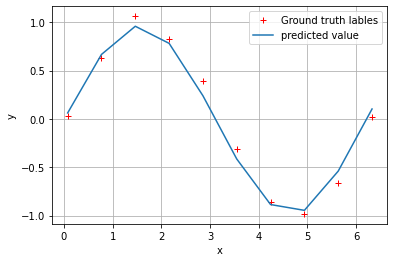

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.000000

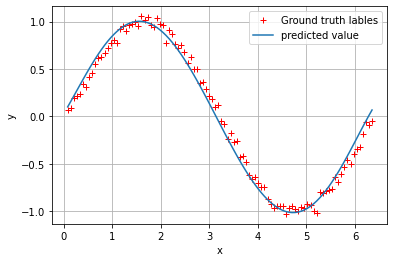

[ 1.          1.          1.         ... 39.32050409 39.39942129
 39.4784176 ]
[  1.           1.           1.         ... 246.56340295 247.3060633
 248.05021344]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.54610204e+03
 1.55231440e+03 1.55854546e+03]
[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 9.69499729e+03
 9.74371578e+03 9.79262991e+03]
m:  5
N:  1000
Training error:  0.001640772765443503
Testing error:  0.0019236929433786426
The model is fitting fine


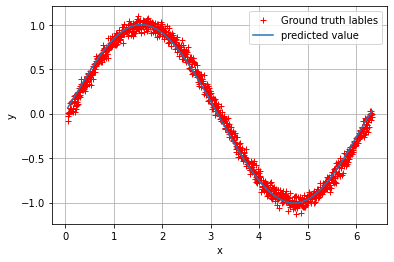

In [3]:
#This is the polynomial case, here we will iterate through m from 2 to 5
for m in range(2,6):
    # Writing N=10,100,1000 as a part of one loop,
    for j in range(3):
        # Number of training/test samples
        N = 10**(j+1)
        # Generate equispaced floats in the interval [0, 2π]
        x = np.linspace(0, 2*np.pi, N)
        # Generate noise
        mean = 0
        std = 0.05
        # Generate some numbers from the sine function
        y = np.sin(x)
        # Add noise
        y += np.random.normal(mean, std, N)

        # m=1
        # y^=b0+b1x

        
        # X is our matrix [1, x1, x1^2,..,x1^m; 1, x2, x2^2,..,x2^m;,....]
        X=np.array([np.ones(N),x])
        for i in range(m-1):
            X=np.append(X,x**(i+2))
            print(X)
        X=np.reshape(X,(m+1,N)).T


        #The optimal B vector [b_0; b_1] is (X.T * X)^-1 X.T y
        pseudo_inv = np.linalg.inv(np.matmul(X.T,X))
        B=np.matmul(pseudo_inv,np.matmul(X.T,y))
        

        #number of test cases T, lets go with N_test=N
        N_test=N
        x_test=np.linspace(0.1*np.random.rand(),2*np.pi+0.1*np.random.rand(),N_test)
        X_test=np.array([np.ones(N_test),x_test])
        for i in range(m-1):
            X_test=np.append(X_test,x_test**(i+2))
        X_test=np.reshape(X_test,(m+1,N)).T
        #print(X_test)

        # Generate some numbers from the sine function
        y_test = np.sin(x)
        # Add noise
        y_test += np.random.normal(mean, std, N_test)

        # The y_cap vector in training
        y_cap_train=np.matmul(X,B)
        # The y_cap vector in testing
        y_cap_test=np.matmul(X_test,B)

        #print(y_cap)

        #R(theta) is given as
        train_error=0
        for i in range(N):
            train_error+=np.square(y[i]-y_cap_train[i])
        train_error=np.sqrt(train_error)/N_test
        test_error=0
        for i in range(N_test):
            test_error+=np.square(y_test[i]-y_cap_test[i])
        test_error=np.sqrt(test_error)/N_test
        print("m: ",m)
        print("N: ",N)
        print("Training error: ", train_error)
        print("Testing error: ", test_error)
        if m==2:
            print("Important observation: uderfitting")
        else :
            print("The model is fitting fine")
        
        #Dsiplay the data
        plt.plot(X_test[:,1], y_test,'r+', label = 'Ground truth lables')
        plt.plot(X_test[:,1], y_cap_test, label = 'predicted value')
        plt.legend()
        plt.grid(1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()
